In [1]:
import torch
import matplotlib.pyplot as plt

from src.manifolds.deformed_sum_of_gaussian_pullback_manifold.deformed_sum_of_identical_gaussian_pullback_manifold.multi_identical_quadratic_banana_pullback_manifold import MultiIdenticalQuadraticBananaPullbackManifold
# from src.riemannian_autoencoder.deformed_gaussian_riemannian_autoencoder import DeformedGaussianRiemannianAutoencoder

0
0


/Users/wdiepeveen/Documents/Postdoc/projects/1 - score-based Riemannian geometry/src/Score-based-Riemannian-geometry/.venv/lib/python3.8/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3550.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


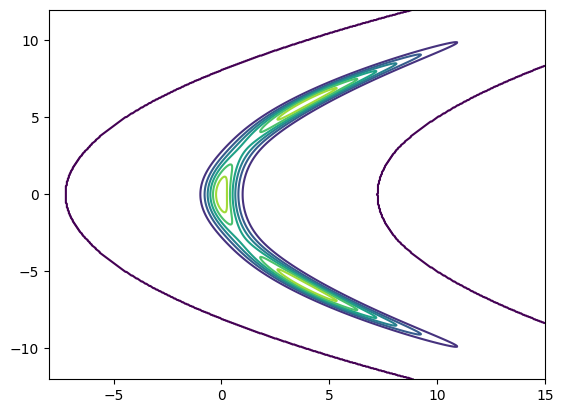

In [2]:
triple_identical_banana_manifold = MultiIdenticalQuadraticBananaPullbackManifold()
print(triple_identical_banana_manifold.L)

xx = torch.linspace(-8.0, 15.0, 500)
yy = torch.linspace(-12.0, 12.0, 500)
x_grid, y_grid = torch.meshgrid(xx, yy)

xy_grid = torch.zeros((*x_grid.shape,2))
xy_grid[:,:,0] = x_grid
xy_grid[:,:,1] = y_grid

density_banana = torch.exp(triple_identical_banana_manifold.dsg.log_density(xy_grid.reshape(-1,2)).reshape(x_grid.shape))
plt.contour(x_grid, y_grid, density_banana)
plt.show()

In [3]:
# special points
x0 = torch.tensor([10.,9.5])
x1 = torch.tensor([10.,-9.5])


# tol = 1e-3
# max_iter = 20000
# step_size = 1/32

iteration 1 | rel_error = 0.009900989942252636
gradient descent was terminated after reaching a relative error 0.009900989942252636 in 1 iterations


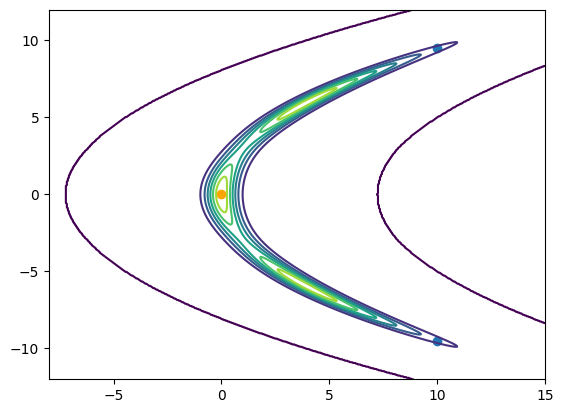

In [4]:
# test barycentre 
x=torch.zeros((2,2))
x[0] = x0
x[1] = x1

barycentre = triple_identical_banana_manifold.barycentre(x).detach().numpy()

plt.contour(x_grid, y_grid, density_banana)
plt.scatter(torch.tensor([x0[0], x1[0]]), torch.tensor([x0[1], x1[1]]))
plt.scatter(barycentre[0], barycentre[1], color="orange")
plt.savefig("results/identical_quadratic_triple_banana/barycentre.eps")
plt.show()

In [5]:
# test inner
X = torch.eye(2)

inner_0 = triple_identical_banana_manifold.inner(torch.zeros(2)[None], X[None], X[None])
inner_x0 = triple_identical_banana_manifold.inner(x0[None], X[None], X[None])

print(inner_0)
print(inner_x0)

tensor([[[16.0000,  0.0000],
         [ 0.0000,  0.0625]]])
tensor([[[ 16.0000, -33.7778],
         [-33.7778,  71.3711]]])


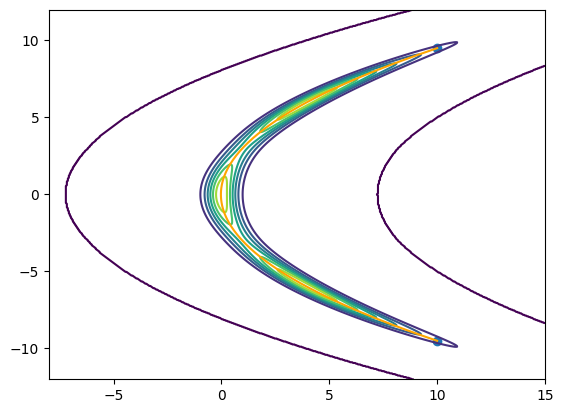

In [6]:
# test interpolation
t = torch.linspace(0.,1.,200)

geodesic = triple_identical_banana_manifold.geodesic(x0,x1,t).detach().numpy()

plt.contour(x_grid, y_grid, density_banana)
plt.plot(geodesic[:,0], geodesic[:,1], color="orange")
plt.scatter(torch.tensor([x0[0], x1[0]]), torch.tensor([x0[1], x1[1]]))
plt.savefig("results/identical_quadratic_triple_banana/geodesic.eps")
plt.show()

# TODO make second plot with decision boundaries so that we can clearly see that we really only have weird geodesics on the boundary region

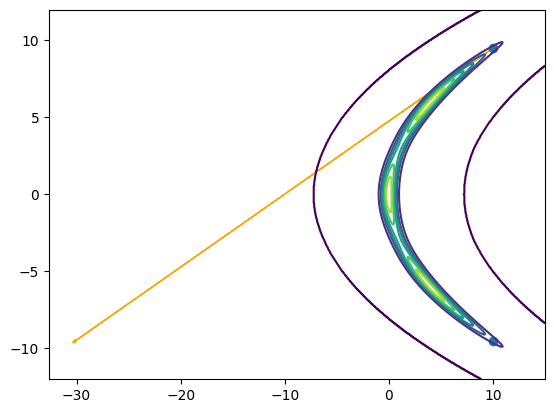

In [7]:
# test logarithmic mapping

logarithmic = triple_identical_banana_manifold.log(x0,x1[None])[0].detach().numpy()

plt.contour(x_grid, y_grid, density_banana)
plt.arrow(x0[0], x0[1], logarithmic[0], logarithmic[1], head_width=0.2, color="orange")
plt.scatter(torch.tensor([x0[0], x1[0]]), torch.tensor([x0[1], x1[1]]))
plt.savefig("results/identical_quadratic_triple_banana/logarithmic.eps")
plt.show()

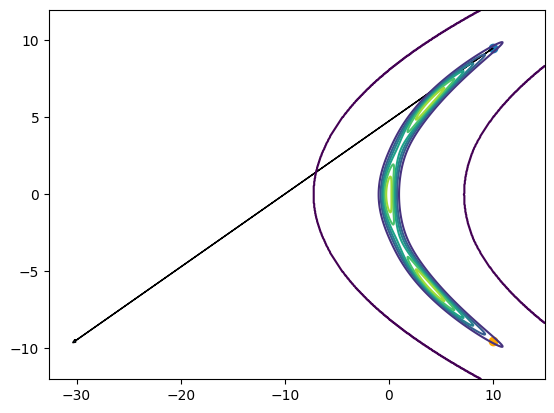

In [8]:
# test exponential mapping
exponential = triple_identical_banana_manifold.exp(x0,torch.tensor(logarithmic)[None])[0].detach().numpy()

plt.contour(x_grid, y_grid, density_banana)
plt.scatter(x0[0], x0[1])
plt.arrow(x0[0], x0[1], logarithmic[0], logarithmic[1], head_width=0.2)
plt.scatter(exponential[0], exponential[1], color="orange")
plt.savefig("results/identical_quadratic_triple_banana/exponential.eps")
plt.show()

In [9]:
# test distance
l2_distance = torch.norm(x0 - x1)
distance = triple_identical_banana_manifold.distance(x0[None,None], x1[None,None])[0,0,0]
print(l2_distance)
print(distance)

tensor(19.)
tensor(4.7500)


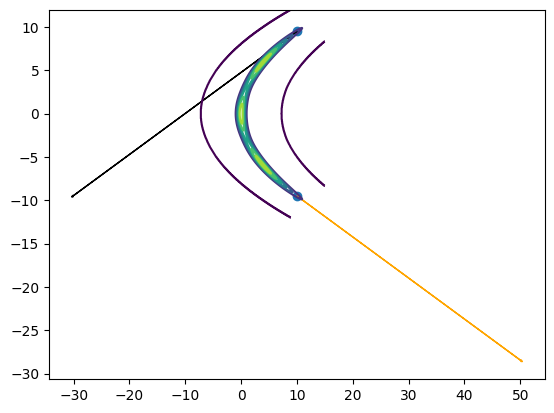

In [11]:
# test parallel transport
parallel_transport = triple_identical_banana_manifold.parallel_transport(x0, torch.tensor(logarithmic)[None], x1)[0]

plt.contour(x_grid, y_grid, density_banana)
plt.scatter(torch.tensor([x0[0], x1[0]]), torch.tensor([x0[1], x1[1]]))
plt.arrow(x0[0], x0[1], logarithmic[0], logarithmic[1], head_width=0.2)
plt.arrow(x1[0], x1[1], parallel_transport[0], parallel_transport[1], head_width=0.2, color="orange")
plt.savefig("results/identical_quadratic_triple_banana/parallel-transport.eps")
plt.show()


tensor([4.0000, 0.2500])
constructed a Riemannian autoencoder with d_eps = 1 and eps = 0.05882352963089943


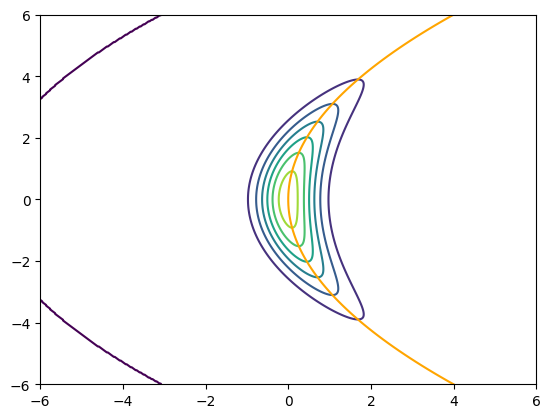

In [ ]:
# Riemannian autoencoder
# TODO multi auto-encoder
epsilon = 0.1
banana_rae = DeformedGaussianRiemannianAutoencoder(banana_manifold, epsilon)

p = torch.linspace(-6, 6, 100)[:,None]
rae_decode_p = banana_rae.decode(p)

plt.contour(x_grid, y_grid, density_banana)
plt.plot(rae_decode_p[:,0], rae_decode_p[:,1], color="orange")
plt.savefig("results/identical_quadratic_triple_banana/rae_manifold.eps")
plt.show()

minimal curvature = -2.0985225709924116e-11 and maximal curvature = 1.6332857288858804e-10


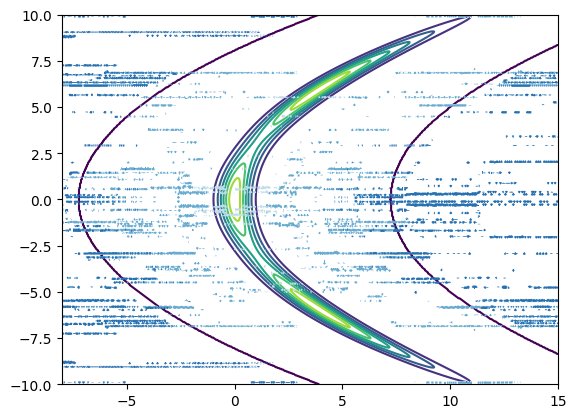

In [ ]:
ricci_scalar = triple_identical_banana_manifold.ricci_scalar(xy_grid.reshape(-1,2)).reshape(x_grid.shape)

print(f"minimal curvature = {ricci_scalar.min()} and maximal curvature = {ricci_scalar.max()}")

log_squared_ricci_scalar = torch.log(ricci_scalar **2)

plt.contour(x_grid, y_grid, density_banana)
# plt.contour(x_grid, y_grid, ricci_scalar, cmap='RdBu')
plt.contour(x_grid, y_grid, log_squared_ricci_scalar, cmap='RdBu')
plt.savefig("results/identical_quadratic_triple_banana/ricci-scalar.eps")
plt.show()